<a href="https://colab.research.google.com/github/partha1189/machine_learning/blob/master/Common_patterns_in_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_series(time, series, format='-', start=0, end=None, label=None):
  plt.plot(time[start:end], series[start:end], format, label = label)
  plt.xlabel('Time')
  plt.ylabel('Value')
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

Trend & Seasonality

In [3]:
def trend(time, slope=0):
  return slope * time

In [4]:
time = np.arange( 4 * 365 + 1)

In [5]:
time

array([   0,    1,    2, ..., 1458, 1459, 1460])

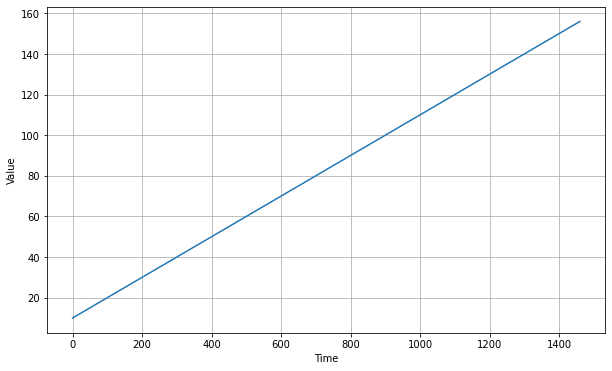

In [6]:
baseline = 10
series = baseline + trend(time, 0.1)

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

In [7]:
series

array([ 10. ,  10.1,  10.2, ..., 155.8, 155.9, 156. ])

In [8]:
def seasonal_pattern(season_time):
  return np.where(season_time < 0.4,
                  np.cos(season_time * 2 * np.pi),
                  1 / np.exp(3 * season_time))
  
def seasonality(time, period, amplitude=1, phase=0):
  season_time = ((time + phase) % period) / period
  return amplitude * seasonal_pattern(season_time)

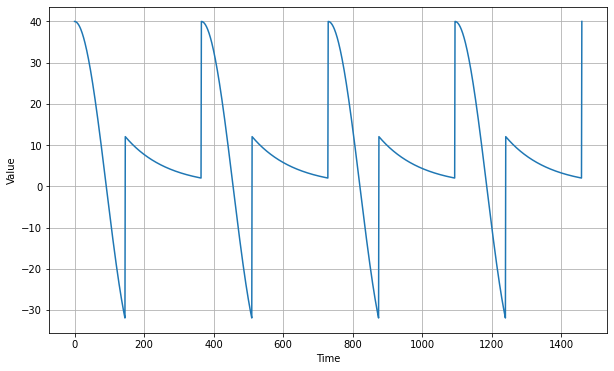

In [9]:
amplitude = 40
series = seasonality(time, period=365, amplitude=amplitude)

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

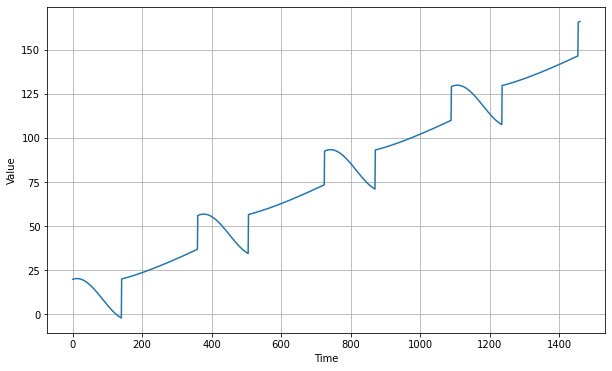

In [11]:
amplitude = 20
series = seasonality(time, period = 365, amplitude=amplitude, phase=5)
series = series + trend(time, slope=0.1)

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

Noise

In [12]:
def white_noise(time, noise_level =1, seed=None):
  rnd = np.random.RandomState(seed)
  return rnd.randn(len(time)) * noise_level

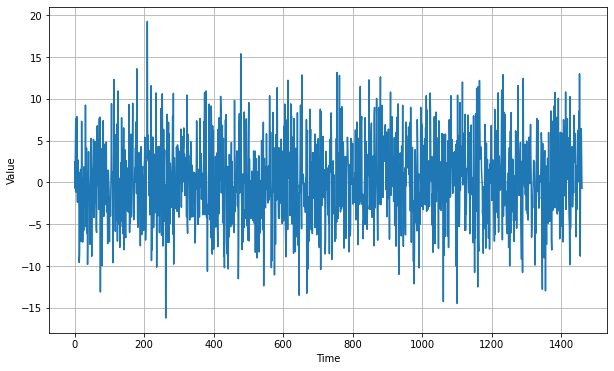

In [13]:
noise_level = 5
noise = white_noise(time, noise_level, seed = 42)

plt.figure(figsize=(10, 6))
plot_series(time, noise)
plt.show()

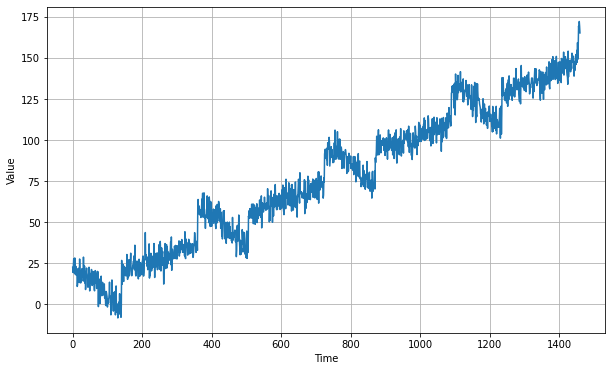

In [14]:
series += noise

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()